In [177]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# graphviz : 나무 구조 시각화  (.dot 확장자 파일 불러오기 등)
from sklearn.tree import export_graphviz  # 트리 그리기
import graphviz
# 다른 방식(.dot -> .png 형식, 출력화면에 맞는)으로 Tree 출력
from subprocess import call
from IPython.display import Image
# Over Sampling
from imblearn.over_sampling import SMOTE

# Check the Frequency of Variable
from collections import Counter

# 회기분석
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from datetime import datetime

# 분류모델 평가 함수
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report
# XGBOOST 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

#
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

# 스케일러
from sklearn.preprocessing import StandardScaler

#
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# 모델

# Tree
from sklearn.tree import DecisionTreeRegressor
# Tree - RandomForest
from sklearn.ensemble import RandomForestRegressor
# Tree - GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
# Decision Tree - 분류 
from sklearn.tree import DecisionTreeClassifier
# Random Forest - 분류 
from sklearn.ensemble import RandomForestClassifier
# Gradient Boosting - 분류
from sklearn.ensemble import GradientBoostingClassifier
# XGBOOST - 분류
from xgboost import XGBClassifier
# SVM - 분류
from sklearn.svm import SVC
# NN (MLPClassifier) - 분류
from sklearn.neural_network import MLPClassifier
# KNN - 분류
from sklearn.neighbors import KNeighborsClassifier

# 선형회귀
from sklearn.linear_model import LinearRegression
# 로지스틱 선형회귀(2진분류)
from statsmodels.api import Logit

#시계열 - arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
# 시계열 - auto arima
from pmdarima import auto_arima




import warnings
warnings.filterwarnings('ignore')

import os
os.environ["PATH"] += os.pathsep + '/usr/bin'

%matplotlib inline

plt.rc('font', family = 'NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [178]:
# 데이터 불러오기 (대출면
df_a = pd.read_csv('/home/piai/바탕화면/보험/DataSet_대출.csv', encoding='euc-kr')
df_a.head()

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,CRDT_OCCR_MDIF,SPTCT_OCCR_MDIF,CRDT_CARD_CNT,CTCD_OCCR_MDIF,CB_GUIF_CNT,CB_GUIF_AMT
0,1,0,1,0,0,0,9001,9001,9001,0,1,0,2,13,3,420001
1,2,0,1,0,0,0,24001,0,24001,0,0,0,2,121,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,1,25,4,121,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,1,25,4,61,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,1,0,1,97,0,0


In [179]:
# 데이터 불러오기 (보험)
df_b = pd.read_csv('/home/piai/바탕화면/보험/DataSet_보험.csv', encoding='euc-kr')
df_b.head()

,CUST_ID,OCCP_NAME_G,CUST_JOB_INCM,HSHD_INFR_INCM,ACTL_FMLY_NUM,CUST_FMLY_NUM,LAST_CHLD_AGE,MATE_OCCP_NAME_G,MATE_JOB_INCM,CRDT_LOAN_CNT,...,TOT_PREM,FMLY_TOT_PREM,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX
0,1,공무원,5400,7700,4,1,24.0,주부,0,0,...,20000000,20000000,0,0,10,0,0,0,50,1
1,2,자영업,5500,8100,4,2,29.0,주부,0,0,...,7000000,36000000,0,0,0,300000,2,5,50,1
2,3,주부,0,4900,4,1,34.0,2차산업 종사자,0,0,...,11000000,11000000,0,0,0,0,0,2,60,2
3,4,학생,0,10100,2,1,0.0,NaN,0,0,...,4000000,4000000,0,0,0,0,0,1,35,1
4,5,공무원,4800,4800,4,1,14.0,주부,0,0,...,4000000,4000000,0,0,0,500000,2,1,45,1


In [180]:
# 데이터 병합
df_merge = pd.merge(df_a, df_b, on='CUST_ID')

In [181]:
# 병합 후 컬럼명 확인
df_merge.columns

Index(['CUST_ID', 'TARGET', 'BNK_LNIF_CNT', 'CPT_LNIF_CNT', 'SPART_LNIF_CNT',
       'ECT_LNIF_CNT', 'TOT_LNIF_AMT', 'TOT_CLIF_AMT', 'BNK_LNIF_AMT',
       'CPT_LNIF_AMT', 'CRDT_OCCR_MDIF', 'SPTCT_OCCR_MDIF', 'CRDT_CARD_CNT',
       'CTCD_OCCR_MDIF', 'CB_GUIF_CNT', 'CB_GUIF_AMT', 'OCCP_NAME_G',
       'CUST_JOB_INCM', 'HSHD_INFR_INCM', 'ACTL_FMLY_NUM', 'CUST_FMLY_NUM',
       'LAST_CHLD_AGE', 'MATE_OCCP_NAME_G', 'MATE_JOB_INCM', 'CRDT_LOAN_CNT',
       'MIN_CNTT_DATE', 'TOT_CRLN_AMT', 'TOT_REPY_AMT', 'CRLN_OVDU_RATE',
       'CRLN_30OVDU_RATE', 'LT1Y_CLOD_RATE', 'STRT_CRDT_GRAD',
       'LTST_CRDT_GRAD', 'PREM_OVDU_RATE', 'LT1Y_PEOD_RATE', 'AVG_STLN_RATE',
       'STLN_REMN_AMT', 'LT1Y_STLN_AMT', 'LT1Y_SLOD_RATE', 'GDINS_MON_PREM',
       'SVINS_MON_PREM', 'FMLY_GDINS_MNPREM', 'FMLY_SVINS_MNPREM',
       'MAX_MON_PREM', 'TOT_PREM', 'FMLY_TOT_PREM', 'CNTT_LAMT_CNT',
       'LT1Y_CTLT_CNT', 'AUTR_FAIL_MCNT', 'FYCM_PAID_AMT', 'FMLY_CLAM_CNT',
       'FMLY_PLPY_CNT', 'AGE', 'SEX'],
      d

In [182]:
# 정보 확인
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100233 entries, 0 to 100232
Data columns (total 54 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CUST_ID            100233 non-null  int64  
 1   TARGET             100233 non-null  int64  
 2   BNK_LNIF_CNT       100233 non-null  int64  
 3   CPT_LNIF_CNT       100233 non-null  int64  
 4   SPART_LNIF_CNT     100233 non-null  int64  
 5   ECT_LNIF_CNT       100233 non-null  int64  
 6   TOT_LNIF_AMT       100233 non-null  int64  
 7   TOT_CLIF_AMT       100233 non-null  int64  
 8   BNK_LNIF_AMT       100233 non-null  int64  
 9   CPT_LNIF_AMT       100233 non-null  int64  
 10  CRDT_OCCR_MDIF     100233 non-null  int64  
 11  SPTCT_OCCR_MDIF    100233 non-null  int64  
 12  CRDT_CARD_CNT      100233 non-null  int64  
 13  CTCD_OCCR_MDIF     100233 non-null  int64  
 14  CB_GUIF_CNT        100233 non-null  int64  
 15  CB_GUIF_AMT        100233 non-null  int64  
 16  OC

In [183]:
# 결측치 확인
df_merge.isnull().sum()

CUST_ID                  0
TARGET                   0
BNK_LNIF_CNT             0
CPT_LNIF_CNT             0
SPART_LNIF_CNT           0
ECT_LNIF_CNT             0
TOT_LNIF_AMT             0
TOT_CLIF_AMT             0
BNK_LNIF_AMT             0
CPT_LNIF_AMT             0
CRDT_OCCR_MDIF           0
SPTCT_OCCR_MDIF          0
CRDT_CARD_CNT            0
CTCD_OCCR_MDIF           0
CB_GUIF_CNT              0
CB_GUIF_AMT              0
OCCP_NAME_G            464
CUST_JOB_INCM            0
HSHD_INFR_INCM           0
ACTL_FMLY_NUM            0
CUST_FMLY_NUM            0
LAST_CHLD_AGE         1027
MATE_OCCP_NAME_G     45709
MATE_JOB_INCM            0
CRDT_LOAN_CNT            0
MIN_CNTT_DATE            0
TOT_CRLN_AMT             0
TOT_REPY_AMT             0
CRLN_OVDU_RATE           0
CRLN_30OVDU_RATE         0
LT1Y_CLOD_RATE           0
STRT_CRDT_GRAD           0
LTST_CRDT_GRAD           0
PREM_OVDU_RATE           0
LT1Y_PEOD_RATE           0
AVG_STLN_RATE            0
STLN_REMN_AMT            0
L

OCCP_NAME_G            464 (직업)
LAST_CHLD_AGE         1027 (막내 나이)
MATE_OCCP_NAME_G     45709 (배우자 직업)

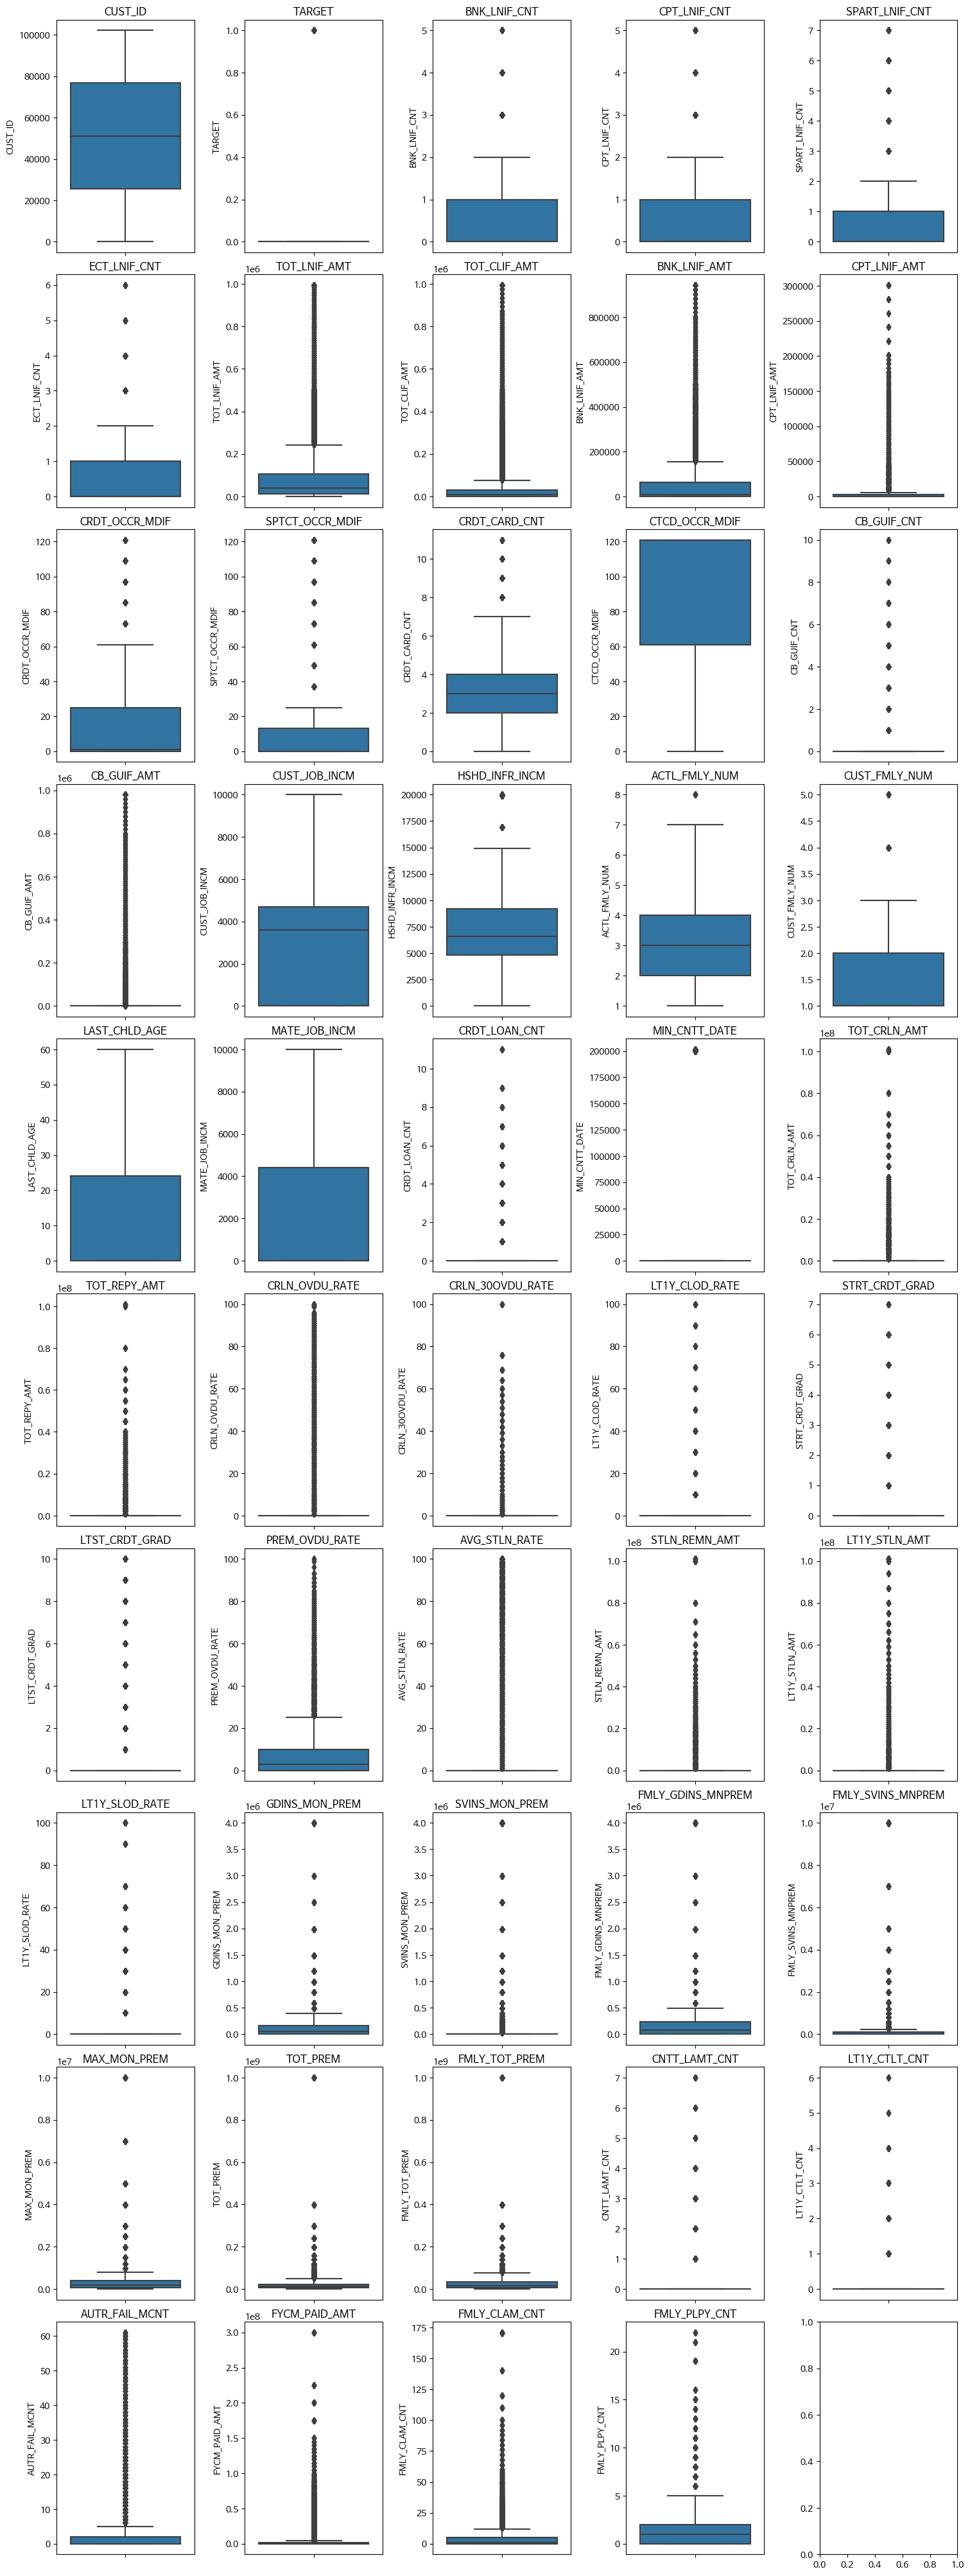

In [184]:
# 수치형 데이터 박스플롯으로 이상치 확인


# 데이터프레임 df_merge에서 이상치를 확인하고 싶은 숫자형 변수들을 선택
numeric_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns

# 서브플롯 설정
fig, axes = plt.subplots(nrows=len(numeric_columns)//5 + 1, ncols=5, figsize=(15, 40), constrained_layout=True)

# 서브플롯에 박스플롯 그리기
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df_merge[col], ax=axes[i//5, i%5])  # 여기서 y=df_merge[col]로 수정
    axes[i//5, i%5].set_title(col)

plt.show()



* 그래프로 확인 불가
* 분석 진행하면서 이상한값들 처리하기로 결정

## 결측치 및 이상치

* OCCP_NAME_G            464 (직업)
* LAST_CHLD_AGE         1027 (막내 나이)
* MATE_OCCP_NAME_G     45709 (배우자 직업)

#### OCCP_NAME_G(직업) 결측치, 이상치 처리

In [185]:
df_merge['OCCP_NAME_G'].fillna('무응답', inplace=True)

In [186]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
고소득 전문직      1223
*            1189
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
무응답           464
Name: OCCP_NAME_G, dtype: int64

In [187]:
df_merge['OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [188]:
df_merge['OCCP_NAME_G'].value_counts()

주부          27565
사무직         16581
2차산업 종사자     9601
자영업          9485
3차산업 종사자     8275
공무원          5091
전문직          5043
단순 사무직       4107
학생           3835
운전직          2126
기타           1672
무응답          1653
고소득 전문직      1223
1차산업 종사자     1178
기업/단체 임원     1041
예체능계 종사자      936
단순 노무직        821
Name: OCCP_NAME_G, dtype: int64

* OCCP_NAME_G(직업) 결측치를 '무응답'처리
* '*'값을 '무응답' 처리

#### MATE_OCCP_NAME_G(배우자 직업) 결측치, 이상치 처리

In [189]:
# 'MATE_JOB_INCM' 열이 0이 아니고 'MATE_OCCP_NAME_G' 열이 결측치인 행 선택
mask = (df_merge['MATE_JOB_INCM'] != 0) & (df_merge['MATE_OCCP_NAME_G'].isnull())

# 선택된 행의 'MATE_OCCP_NAME_G' 열을 '무응답'으로 채우기
df_merge.loc[mask, 'MATE_OCCP_NAME_G'] = '무응답'

# 나머지 'MATE_OCCP_NAME_G' 열의 결측치를 '배우자 없음'으로 채우기
df_merge['MATE_OCCP_NAME_G'].fillna('배우자 없음', inplace=True)

In [190]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
단순 사무직       1316
*            1027
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
무응답           360
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64

* 결측치 중 360개를 무응답 처리

In [191]:
df_merge['MATE_OCCP_NAME_G'].replace('*','무응답', inplace=True)

In [192]:
df_merge['MATE_OCCP_NAME_G'].value_counts()

배우자 없음      45349
주부          11683
사무직         10053
2차산업 종사자     8107
자영업          6380
3차산업 종사자     4011
운전직          2887
공무원          2400
전문직          2105
1차산업 종사자     1411
무응답          1387
단순 사무직       1316
기업/단체 임원      931
고소득 전문직       560
단순 노무직        549
기타            534
예체능계 종사자      461
학생            109
Name: MATE_OCCP_NAME_G, dtype: int64


* '*'값을 '무응답' 처리

#### LAST_CHLD_AGE(막내나이) 결측값

In [193]:
# 결측값을 KNN보간법으로 처리하기 위하여 변수들간 상관관계 확인
df_merge.corr()['LAST_CHLD_AGE']

CUST_ID              0.001767
TARGET              -0.021266
BNK_LNIF_CNT        -0.007348
CPT_LNIF_CNT        -0.019383
SPART_LNIF_CNT       0.010164
ECT_LNIF_CNT         0.032922
TOT_LNIF_AMT         0.041163
TOT_CLIF_AMT         0.021346
BNK_LNIF_AMT         0.022599
CPT_LNIF_AMT        -0.009114
CRDT_OCCR_MDIF       0.066958
SPTCT_OCCR_MDIF      0.075368
CRDT_CARD_CNT        0.019596
CTCD_OCCR_MDIF       0.098527
CB_GUIF_CNT          0.022137
CB_GUIF_AMT          0.017837
CUST_JOB_INCM       -0.160491
HSHD_INFR_INCM       0.128827
ACTL_FMLY_NUM        0.611842
CUST_FMLY_NUM        0.207177
LAST_CHLD_AGE        1.000000
MATE_JOB_INCM        0.211298
CRDT_LOAN_CNT        0.138272
MIN_CNTT_DATE        0.162544
TOT_CRLN_AMT         0.120381
TOT_REPY_AMT         0.115229
CRLN_OVDU_RATE       0.125099
CRLN_30OVDU_RATE     0.035256
LT1Y_CLOD_RATE       0.027591
STRT_CRDT_GRAD       0.067917
LTST_CRDT_GRAD       0.096891
PREM_OVDU_RATE       0.076861
AVG_STLN_RATE        0.116409
STLN_REMN_

In [194]:
from sklearn.impute import KNNImputer

# KNNImputer 객체 생성
imputer = KNNImputer(n_neighbors=5)

# 'LAST_CHLD_AGE'열과 'ACTL_FMLY_NUM'열을 선택하여 보간 수행
columns_to_interpolate = ['LAST_CHLD_AGE', 'ACTL_FMLY_NUM']
df_merge[columns_to_interpolate] = imputer.fit_transform(df_merge[columns_to_interpolate])

* CUST_FMLY_NUM(가족수) LAST_CHLD_AGE(막내나이)변수의 주변 5개 평균으로 결측처리 완료

#### AGE, SEX열 '*'값

In [195]:
df_merge[df_merge['AGE']== '*']['AGE'].count()

430

In [196]:
df_merge[df_merge['SEX']== '*']['SEX'].count()

430

* 일단 추후에 성별, 나이를 사용하는 분석 or 모델링에서는 '*'를 제외하고 사용하도록 하자
* 다른 컬럼의 값은 유효하므로 바로 제거하는 판단은 x

## 파생변수 생성

#### 양육기 변수 생성

In [197]:
# '양육기' 컬럼 추가 및 초기화
df_merge['양육기'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기' 컬럼에 값을 할당
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) <= 20, '양육기'] = 1
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기'] = 0

* 막내자녀가 20세 미만인 가입자 유무를 0/1로 표시

#### 양육기간 변수 생성

In [198]:
# '양육기간' 컬럼 추가 및 초기화
df_merge['양육기간'] = 0

# 'LAST_CHLD_AGE'열과 'AGE'열 값의 크기를 비교하여 조건에 따라 '양육기간' 컬럼에 값을 할당
df_merge['양육기간'] = df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1)
df_merge['양육기간'] = df_merge['양육기간'].apply(lambda x: 30 - x if x <= 30 else 0)
df_merge.loc[df_merge[['LAST_CHLD_AGE', 'AGE']].min(axis=1) == 0, '양육기간'] = 0

* 보험사에서 보험계약기준으로 사용하는 30세를 기준으로 계약을 얼마나 할 수 있는나 30-막내나이 변수를 생성

In [199]:
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,CNTT_LAMT_CNT,LT1Y_CTLT_CNT,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,10,0,0,0,50,1,0,6.0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,0,0,300000,2,5,50,1,0,1.0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,0,0,2,60,2,0,0.0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,0,0,1,35,1,0,0.0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,0,0,500000,2,1,45,1,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,0,0,1,700000,0,3,55,2,0,0.0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,0,0,100000,0,3,45,2,1,11.0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,0,1,0,0,4,45,1,1,16.0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,0,0,45,1,0,0.0


In [200]:
df_merge.isnull().sum()

CUST_ID              0
TARGET               0
BNK_LNIF_CNT         0
CPT_LNIF_CNT         0
SPART_LNIF_CNT       0
ECT_LNIF_CNT         0
TOT_LNIF_AMT         0
TOT_CLIF_AMT         0
BNK_LNIF_AMT         0
CPT_LNIF_AMT         0
CRDT_OCCR_MDIF       0
SPTCT_OCCR_MDIF      0
CRDT_CARD_CNT        0
CTCD_OCCR_MDIF       0
CB_GUIF_CNT          0
CB_GUIF_AMT          0
OCCP_NAME_G          0
CUST_JOB_INCM        0
HSHD_INFR_INCM       0
ACTL_FMLY_NUM        0
CUST_FMLY_NUM        0
LAST_CHLD_AGE        0
MATE_OCCP_NAME_G     0
MATE_JOB_INCM        0
CRDT_LOAN_CNT        0
MIN_CNTT_DATE        0
TOT_CRLN_AMT         0
TOT_REPY_AMT         0
CRLN_OVDU_RATE       0
CRLN_30OVDU_RATE     0
LT1Y_CLOD_RATE       0
STRT_CRDT_GRAD       0
LTST_CRDT_GRAD       0
PREM_OVDU_RATE       0
LT1Y_PEOD_RATE       0
AVG_STLN_RATE        0
STLN_REMN_AMT        0
LT1Y_STLN_AMT        0
LT1Y_SLOD_RATE       0
GDINS_MON_PREM       0
SVINS_MON_PREM       0
FMLY_GDINS_MNPREM    0
FMLY_SVINS_MNPREM    0
MAX_MON_PRE

# 해지/비해지별 데이터 상관성 분석
* 목표변수: 해지고객 = '실효해지건수>1', 비해지고객 = '실효해지건수=0'

In [201]:
# '실효해지건수'를 기반으로 '이탈고객' 변수 생성
df_merge['이탈고객'] = df_merge['CNTT_LAMT_CNT'].apply(lambda x: 1 if x >= 1 else 0)

# 결과를 출력
print(df_merge)

        CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
0             1       0             1             0               0   
1             2       0             1             0               0   
2             3       0             0             1               3   
3             4       1             0             2               4   
4             5       0             4             0               0   
...         ...     ...           ...           ...             ...   
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
0                  0          9001          9001          9001     

In [202]:
df_merge['이탈고객'].value_counts()

0    91910
1     8323
Name: 이탈고객, dtype: int64

<신용등급>
* 신용등급_차이: 최근 신용등급과 최초 신용등급의 차이를 나타내는 파생변수

In [203]:
df_merge['신용등급_차이'] = df_merge['LTST_CRDT_GRAD'] - df_merge['STRT_CRDT_GRAD']
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,AUTR_FAIL_MCNT,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,이탈고객,신용등급_차이
0,1,0,1,0,0,0,9001,9001,9001,0,...,10,0,0,0,50,1,0,6.0,0,0
1,2,0,1,0,0,0,24001,0,24001,0,...,0,300000,2,5,50,1,0,1.0,0,0
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,0,2,60,2,0,0.0,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,0,1,35,1,0,0.0,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,0,500000,2,1,45,1,1,16.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,1,700000,0,3,55,2,0,0.0,0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,0,100000,0,3,45,2,1,11.0,0,0
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,1,0,0,4,45,1,1,16.0,0,0
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,0,45,1,0,0.0,0,0


In [204]:
df_merge['신용등급_차이'].unique()

array([ 0,  2,  1, -1,  9,  3,  5,  8,  4,  7,  6, 10, -2, -3, -4])

In [205]:
df_merge['신용등급_차이'].describe()

count    100233.000000
mean          0.143925
std           0.874770
min          -4.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: 신용등급_차이, dtype: float64

In [206]:
df_merge['OCCP_NAME_G'].unique()

array(['공무원', '자영업', '주부', '학생', '3차산업 종사자', '기업/단체 임원', '단순 사무직', '사무직',
       '단순 노무직', '무응답', '고소득 전문직', '2차산업 종사자', '운전직', '전문직', '기타',
       '예체능계 종사자', '1차산업 종사자'], dtype=object)

In [207]:
# '막내나이' 컬럼을 기반으로 '막내나이_분류' 생성
# 1이상~30세 이하인 경우에는 1, 그 외의 경우에는 0
df_merge['막내나이_분류'] = df_merge['LAST_CHLD_AGE'].apply(lambda x: 1 if (x >= 1) and (x <= 30) else 0)
df_merge

,CUST_ID,TARGET,BNK_LNIF_CNT,CPT_LNIF_CNT,SPART_LNIF_CNT,ECT_LNIF_CNT,TOT_LNIF_AMT,TOT_CLIF_AMT,BNK_LNIF_AMT,CPT_LNIF_AMT,...,FYCM_PAID_AMT,FMLY_CLAM_CNT,FMLY_PLPY_CNT,AGE,SEX,양육기,양육기간,이탈고객,신용등급_차이,막내나이_분류
0,1,0,1,0,0,0,9001,9001,9001,0,...,0,0,0,50,1,0,6.0,0,0,1
1,2,0,1,0,0,0,24001,0,24001,0,...,300000,2,5,50,1,0,1.0,0,0,1
2,3,0,0,1,3,2,15001,9001,0,3001,...,0,0,2,60,2,0,0.0,0,0,0
3,4,1,0,2,4,2,6001,3001,0,3001,...,0,0,1,35,1,0,0.0,0,0,0
4,5,0,4,0,0,0,21001,15001,21001,0,...,500000,2,1,45,1,1,16.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100228,102248,0,1,0,2,2,75001,15001,57001,0,...,700000,0,3,55,2,0,0.0,0,0,0
100229,102249,0,2,0,0,0,54001,9001,54001,0,...,100000,0,3,45,2,1,11.0,0,0,1
100230,102250,0,1,0,0,0,27001,27001,27001,0,...,0,0,4,45,1,1,16.0,0,0,1
100231,102251,0,0,0,1,1,57001,0,0,0,...,0,0,0,45,1,0,0.0,0,0,0


# 직업재분류
* 너무 많아서 소득/수입 안정성 기준으로 공통점이 있는 직업들끼리 묶어서 보기로 함

In [208]:
#특정 열 이름
column_name = 'OCCP_NAME_G'
#해당 열 추출
occupation_column = df_merge[column_name]

def classify_occupation(occupation):
    if occupation in ['기업/단체 임원', '고소득 전문직', '전문직']:
        return '고소득 전문직'
    elif occupation in ['단순 사무직', '사무직', '공무원']:
        return '사무직 및 관리직'
    elif occupation in ['3차산업 종사자', '자영업']:
        return '서비스 및 판매직'
    elif occupation in ['2차산업 종사자', '1차산업 종사자', '운전직', '단순노무직']:
        return '기술직 및 생산직'
    elif occupation in ['예체능계 종사자']:
        return '예체능계 종사자'
    else:
        return '학생 및 비경제 활동/기타'
    
# 'OCCP_NAME_G' 컬럼을 바탕으로 새로운 '직업재분류' 컬럼 생성
df_merge['직업재분류'] = df_merge['OCCP_NAME_G'].apply(classify_occupation)

# 새로운 분류를 저장할 컬럼 추가
df_merge['직업재분류'] = occupation_column.apply(classify_occupation)

# 결과 확인
print(df_merge[['OCCP_NAME_G', '직업재분류']])

       OCCP_NAME_G           직업재분류
0              공무원       사무직 및 관리직
1              자영업       서비스 및 판매직
2               주부  학생 및 비경제 활동/기타
3               학생  학생 및 비경제 활동/기타
4              공무원       사무직 및 관리직
...            ...             ...
100228         자영업       서비스 및 판매직
100229         운전직       기술직 및 생산직
100230         자영업       서비스 및 판매직
100231         사무직       사무직 및 관리직
100232         사무직       사무직 및 관리직

[100233 rows x 2 columns]


In [209]:
df_merge['직업재분류'].value_counts()

학생 및 비경제 활동/기타    35546
사무직 및 관리직         25779
서비스 및 판매직         17760
기술직 및 생산직         12905
고소득 전문직            7307
예체능계 종사자            936
Name: 직업재분류, dtype: int64

# '이탈고객'과 '보험료 연체율' 비교

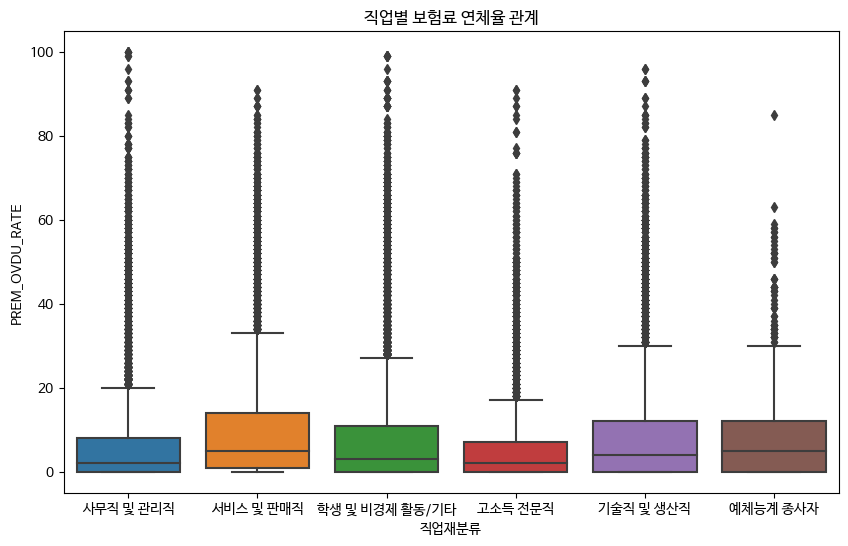

In [210]:
#1. '이탈고객'변수와 '보험료연체율' 비교. #seaborn을 사용하여 boxplot그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='직업재분류', y='PREM_OVDU_RATE', data=df_merge)
plt.title('직업별 보험료 연체율 관계')
plt.show()

* 상자수염그래프 볼 때...
1. 소득/수입이 안정적인 직업군: 사무직 및 관리직, 고소득 전문직
2. 소득/수입이 불안정한 직업군: 서비스 및 판매직, 기술직 및 생산직, 예체능계 종사자

모든 직업군에서의 최빈값(50%)은 유사한 수치로 나타난다. 그러나, 박스플롯의 상한선을 살펴봤을 때, 안정성이 높은 1직업군의 상한선은 특히 낮게 나타남. 즉, 보험료 연체율이 낮다. 
반면, 안정성이 낮은 2직업군의 상한선은 특히 높게 나타났다. 즉, 보험료 연체율이 높다. 

>>>인사이트: 낮은 보험료 연체율 경향성을 보이는 1직업군에게 자사 보험상품을 적극 마케팅해야 한다.
: (1) 보험료 연체율이 낮은 이유와 어떤 부가 혜택이 있는지를 파악하여 마케팅 전략에 활용가능하다. (2) '낮은 보험료 연체율'을 강조한 추가혜택/할인제도 도입하여 해당 집단의 고객 유치를 높일 수 있음. 직업 안정성이 높은 "사무직 및 관리직", "고소득 전문직" 그룹의 특성에 맞춘 마케팅 전략을 통해 고객 관심을 끌 수 있다. 

- 서비스 및 판매직: 보험료 납부를 장려하거나 연체 예방할 수 있는 혜택 제공 전략 필요. 할부결제, 자동 이체 등. 보험료 납입의 편의성 강화를 통하여 보험료를 보다 쉽게 납부할 수 있도록 도움을 줄 수 있음. 


- 예체능계 종사자: 유동적 수입 특성을 고려한 보험 상품/납부방식을 제공 ==> 이런식으로 해당 집단의 보험 가입 유도 가능.하지만, 굳이???

==> 사무직 및 관리직, 고소득 전문직에서 보이는 특징을 찾자!

<가설검정>
* 귀무가설(H0): '보험료 연체율'의 '직업재분류'별 평균에는 차이가 없다. 즉, 이들의 차이는 통계적으로 유의하지 않다. 
* 대립가설(H1): '보험료 연체율'의 '직업재분류'별 평균에는 차이가 있다. 즉, 이들의 차이는 통계적으로 유의하다. 

<0.05면, 귀무가설 기각 대립가설 채택, >0.05면 귀무가설 채택 대립가설 기각

In [211]:
#ANOVA 검정
import scipy.stats as stats

# 범주형 변수로 그룹을 나누고 연속형 변수의 값들을 리스트로 저장합니다.
group1 = df_merge[df_merge['직업재분류'] == '사무직 및 관리직']['PREM_OVDU_RATE'].tolist()
group2 = df_merge[df_merge['직업재분류'] == '서비스 및 판매직']['PREM_OVDU_RATE'].tolist()
group3 = df_merge[df_merge['직업재분류'] == '학생 및 비경제 활동/기타']['PREM_OVDU_RATE'].tolist()
group4 = df_merge[df_merge['직업재분류'] == '고소득 전문직']['PREM_OVDU_RATE'].tolist()
group5 = df_merge[df_merge['직업재분류'] == '기술직 및 생산직']['PREM_OVDU_RATE'].tolist()
group6 = df_merge[df_merge['직업재분류'] == '예체능계 종사자']['PREM_OVDU_RATE'].tolist()                                                                     

# ANOVA 검정 수행
f_statistic, p_value = stats.f_oneway(group1, group2, group3, group4, group5, group6)

# 결과 출력
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# p-value를 기준으로 유의수준을 선택하고 결과를 해석합니다.
if p_value < 0.05:
    print("ANOVA 결과: 그룹 간 평균 차이가 통계적으로 유의미합니다.")
else:
    print("ANOVA 결과: 그룹 간 평균 차이가 통계적으로 유의미하지 않습니다.")

F-statistic: 262.2429371906371
p-value: 1.6352928864853003e-279
ANOVA 결과: 그룹 간 평균 차이가 통계적으로 유의미합니다.


# 직업별 보험가입 여부, 비율

1. '보장성보험가입 유무' 파생변수 생성
2. '저축성보험가입 유무' 파생변수 생성
3. '저축성/보장성 보험' 둘 다 가입(2), 하나 가입(1), 둘 다 가입하지 않음(0) 을 가리키는 파생변수 생성

In [212]:
# '비연금저축상품월납입보험료' 값이 0이 아니면 1로, 0이면 0으로 하는 '보장보험가입' 파생 변수 생성
df_merge['보장보험가입'] = df_merge['GDINS_MON_PREM'].apply(lambda x: 1 if x != 0 else 0)

# 결과 확인
print(df_merge[['GDINS_MON_PREM', '보장보험가입']]) #0이 아니면 보장보험가입한 것으로 간주하고 '1'로 변환함

        GDINS_MON_PREM  보장보험가입
0               190000       1
1                    0       0
2                    0       0
3                    0       0
4                    0       0
...                ...     ...
100228               0       0
100229          230000       1
100230           90000       1
100231           40000       1
100232               0       0

[100233 rows x 2 columns]


In [213]:
# '연금저축상품월납입보험료' 값이 0이 아니면 1로, 0이면 0으로 하는 '저축보험가입' 파생 변수 생성
df_merge['저축보험가입'] = df_merge['SVINS_MON_PREM'].apply(lambda x: 1 if x != 0 else 0)

# 결과 확인
print(df_merge[['SVINS_MON_PREM', '저축보험가입']]) #0이 아니면 저축보험가입한 것으로 간주하고 '1'로 변환함

        SVINS_MON_PREM  저축보험가입
0                    0       0
1                    0       0
2                    0       0
3                    0       0
4                    0       0
...                ...     ...
100228          990000       1
100229               0       0
100230          590000       1
100231               0       0
100232          300000       1

[100233 rows x 2 columns]


In [214]:
# '보장보험가입' 파생변수와 '저축보험가입' 파생변수를 더하여 '보험가입' 파생변수 생성
df_merge['보험가입'] = df_merge['보장보험가입'] + df_merge['저축보험가입']

# 결과 확인
print(df_merge[['보험가입', '보장보험가입', '저축보험가입']])

        보험가입  보장보험가입  저축보험가입
0          1       1       0
1          0       0       0
2          0       0       0
3          0       0       0
4          0       0       0
...      ...     ...     ...
100228     1       0       1
100229     1       1       0
100230     2       1       1
100231     1       1       0
100232     1       0       1

[100233 rows x 3 columns]


1. 보장보험가입자 중, 새롭게 재분류한 직업별 분포를 살펴봄. (교수님이 도출할 수 있는건 별로 없다고 했음)

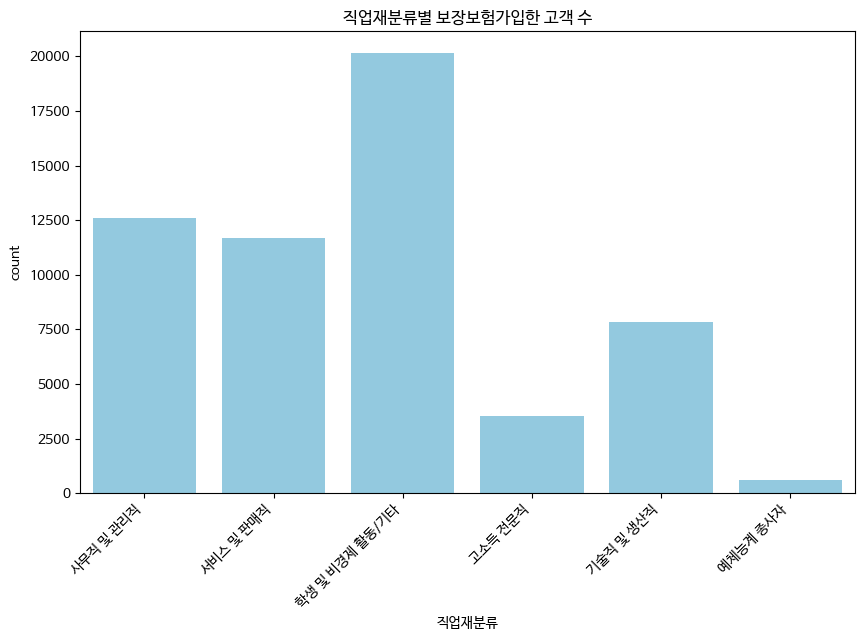

In [215]:
# '보장보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['보장보험가입'] == 1]

# '직업재분류'의 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='직업재분류', data=df_with_insurance1,  color='skyblue')
plt.title('직업재분류별 보장보험가입한 고객 수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전 및 정렬
plt.show()

수입/소득 안정성이 높고&보험료 연체율이 낮은 1직업군('사무직 및 관리직', '고소득 전문직') 고객의 보장보험 가입 빈도수를 비교해볼 때, '사무직 및 관리직'은 전체 2위로 높게(12500) 나오는데 반해 고소득 전문직(약 4000)의 수치는 매우 낮은 수준임.

==> '고소득 전문직' 고객층의 보장보험 가입이 다른 직업군 대비 저조한 이유를 확인해보고, 해당 직업군의 특성 파악. 

==> 특히 고소득 전문직의 특성에 맞춘 마케팅 전략을 통해 고객 관심을 끌 수 있다.

* '보장보험가입' == 1 인 사람들의 직업 분포 비교

: 학생 및 비경제활동/기타 > 사무직 및 관리직 > 서비스 및 판매직 > 기술직 및 생산직 > 고소득 전문직 > 예체능계 종사자

2. 저축보험가입자 중, 새롭게 재분류한 직업별 분포를 살펴봄. (교수님이 도출할 수 있는건 별로 없다고 했음)

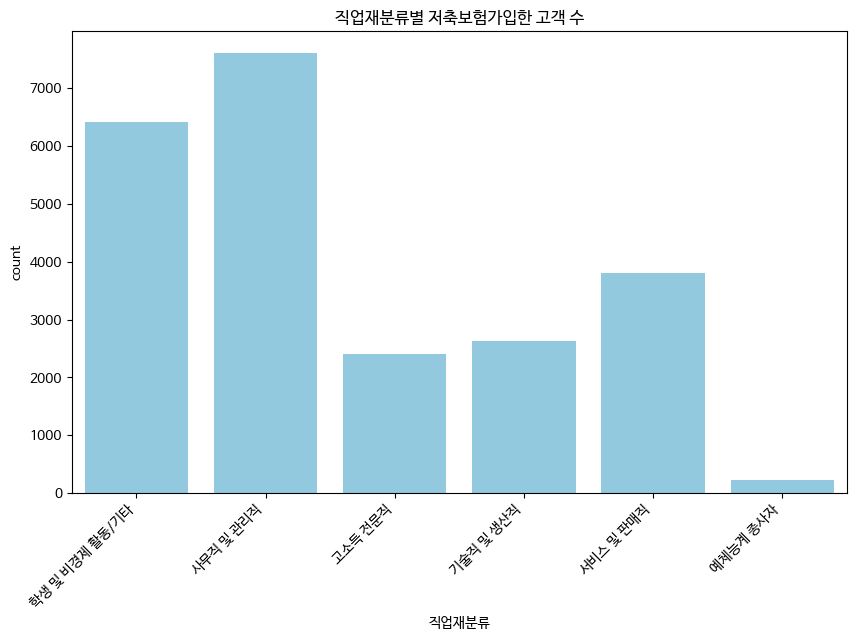

In [216]:
# '저축보험가입'이 1인 부분 선택
df_with_insurance2 = df_merge[df_merge['저축보험가입'] == 1]

# '직업재분류'의 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='직업재분류', data=df_with_insurance2, color='skyblue')
plt.title('직업재분류별 저축보험가입한 고객 수')
plt.xticks(rotation=45, ha='right')  # X축 레이블 회전 및 정렬
plt.show()

'저축성보험가입'에서는 특히 수익/소득 안정성이 높은 직업군인 '사무직 및 관리직'의 빈도수가 가장 높게 나타남.
반면, 똑같이 수익/소득 안정성이 높은 '고소득 전문직'의 빈도수는 상대적으로 낮게 나타남. 

==> 소득/수익 안정성이 있지만, 고소득 전문직의 가입자 수가 적은 원인을 찾고, 이에 맞는 고소득 전문직 집중 마케팅을 벌여야 한다. 

만약 홍보 부족이라면 홍보를 강화하고, 현 보험상품이 고소득 전문직 고객들에게 주는 혜택/편리성이 부족해그런거라면, 혜택을 강화한 상품을 개발해보이거나 보험 가입/ 보험료 납입에서의 편리성을 증대시켜야 한다. 

저축성 보장성 저축보장성 ==> 둘다 가입하지 않은 고객까지 다 합쳐서 : 모든 경우수

    전체 분에 고소득 직업 중 보장보험 가입한 사람만
    전체 분에 고소득 직업 중 저축보험 가입한 사람만 

In [217]:
# '보장보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['보장보험가입'] == 1]

# 직업재분류별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('직업재분류')['보장보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

직업재분류
고소득 전문직            3532
기술직 및 생산직          7857
사무직 및 관리직         12581
서비스 및 판매직         11695
예체능계 종사자            620
학생 및 비경제 활동/기타    20137
Name: 보장보험가입, dtype: int64


In [218]:
# '저축보험가입'이 1인 부분 선택
df_wi축h_insurance1 = df_merge[df_merge['저축보험가입'] == 1]

# 직업재분류별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('직업재분류')['저축보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

직업재분류
고소득 전문직            3532
기술직 및 생산직          7857
사무직 및 관리직         12581
서비스 및 판매직         11695
예체능계 종사자            620
학생 및 비경제 활동/기타    20137
Name: 저축보험가입, dtype: int64


# 파생변수 생성: 보험가입(0,1,2)
보험을 둘 다 가입했는지, 둘 중 하나만 가입했는지, 둘 다 미가입 상태인지 확인하기 위해 '보험가입'이라는 새로운 파생변수 생성

* 보험가입 == 0: 보험 미가입자
* 보험가입 == 1: 저축성 보험 or 보장성 보험 중 하나만 가입한 사람
* 보험가입 == 2: 저축성 보험 and 보장성 보험 둘 다 가입한 사람

In [219]:
# '보장보험가입' 파생변수와 '저축보험가입' 파생변수를 더하여 '보험가입' 파생변수 생성
df_merge['보험가입'] = df_merge['보장보험가입'] + df_merge['저축보험가입']

# 결과 확인
print(df_merge[['보험가입', '보장보험가입', '저축보험가입']])

        보험가입  보장보험가입  저축보험가입
0          1       1       0
1          0       0       0
2          0       0       0
3          0       0       0
4          0       0       0
...      ...     ...     ...
100228     1       0       1
100229     1       1       0
100230     2       1       1
100231     1       1       0
100232     1       0       1

[100233 rows x 3 columns]


In [220]:
# '저축성/보장성 보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['보험가입'] == 0]

# 직업재분류별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('직업재분류')['보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

직업재분류
고소득 전문직            2138
기술직 및 생산직          3738
사무직 및 관리직          8285
서비스 및 판매직          4532
예체능계 종사자            213
학생 및 비경제 활동/기타    12171
Name: 보험가입, dtype: int64


# 막내자녀나이 vs 보험가입(0, 1, 2)

* 저축성보험 vs 보장성 보험: 가입비율 연령별 비교

In [221]:
df_merge['LAST_CHLD_AGE']

0         24.0
1         29.0
2         34.0
3          0.0
4         14.0
          ... 
100228    34.0
100229    19.0
100230    14.0
100231     0.0
100232    24.0
Name: LAST_CHLD_AGE, Length: 100233, dtype: float64

In [222]:
# '막내자녀나이'를 두 개의 구간으로 나누기
bins = [-float('inf'), 1, 30, float('inf')]  # 0 이상 30 이하, 30 초과
labels = ['0', '1~30.0이하', '30.0초과']
df_merge['막내자녀나이_구간'] = pd.cut(df_merge['LAST_CHLD_AGE'], bins=bins, labels=labels, right=False)

# 결과 확인
print(df_merge)

        CUST_ID  TARGET  BNK_LNIF_CNT  CPT_LNIF_CNT  SPART_LNIF_CNT  \
0             1       0             1             0               0   
1             2       0             1             0               0   
2             3       0             0             1               3   
3             4       1             0             2               4   
4             5       0             4             0               0   
...         ...     ...           ...           ...             ...   
100228   102248       0             1             0               2   
100229   102249       0             2             0               0   
100230   102250       0             1             0               0   
100231   102251       0             0             0               1   
100232   102252       0             1             0               0   

        ECT_LNIF_CNT  TOT_LNIF_AMT  TOT_CLIF_AMT  BNK_LNIF_AMT  CPT_LNIF_AMT  \
0                  0          9001          9001          9001     

<Figure size 800x800 with 0 Axes>

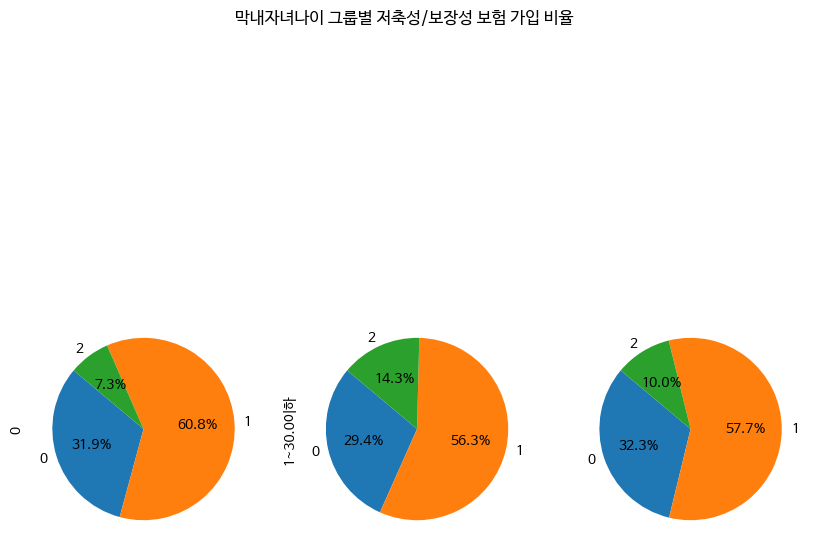

In [223]:
# 그룹된 원 그래프 생성
plt.figure(figsize=(8, 8))
df_pie = df_merge.groupby(['보험가입', '막내자녀나이_구간']).size().unstack()
df_pie.plot.pie(subplots=True, autopct='%1.1f%%', startangle=140, legend=False, figsize=(10, 8))

# 그래프 커스터마이징
plt.suptitle('막내자녀나이 그룹별 저축성/보장성 보험 가입 비율', y=1.02)
plt.ylabel('')  # y축 레이블 제거

# 그래프 표시
plt.show()

* 0이든, 1~30이하든, 30초과 그룹이든 보험을 1개만 가입한 비율은 유사함. 
* 보험을 두 개 모두 가입한 비중은 1~30이하 구간에서 상대적으로 큼을 확인 가능하다.

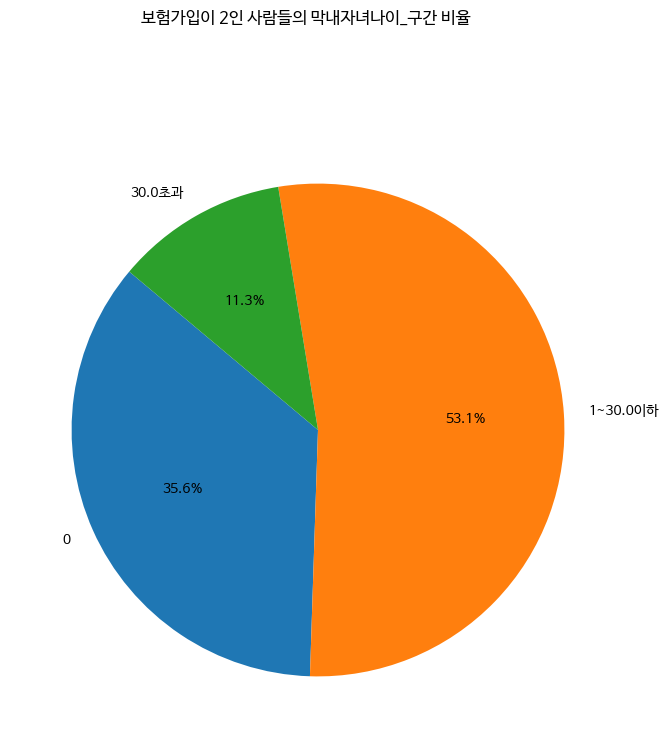

In [224]:
import matplotlib.pyplot as plt

# 필터링: '보험가입' 변수의 값이 2인 행만 선택
filtered_df = df_merge[df_merge['보험가입'] == 2]

# 그룹된 원 그래프 생성
plt.figure(figsize=(8, 8))
df_pie = filtered_df.groupby('막내자녀나이_구간').size()
df_pie.plot.pie(autopct='%1.1f%%', startangle=140, legend=False, figsize=(10, 8))

# 그래프 커스터마이징
plt.suptitle('보험가입이 2인 사람들의 막내자녀나이_구간 비율', y=1.02)
plt.ylabel('')  # y축 레이블 제거

# 그래프 표시
plt.show()

[가설검정2: 막내자녀나이_구간 vs 보험가입(0 or 1 or 2)]
* 귀무가설(H0): '막내자녀나이'와 '보험가입'은 통계적으로 유의한 관련성이 없다. 
* 대립가설(H1): '막내자녀나이'와 '보험가입'은 통계적으로 유의한 관련성이 있다. 

<0.05: 귀무가설 기각 대립가설 채택, >0.05: 귀무가설 채택 대립가설 기각

In [225]:
from scipy.stats import chi2_contingency

# 카이제곱 검정을 위해 데이터프레임에서 '직업재분류'와 '보험가입' 컬럼만 선택
data_for_chi2 = df_merge[['막내자녀나이_구간', '보험가입']]

# 직업재분류와 보험가입 사이의 카이제곱 검정 실행
chi2, p, _, _ = chi2_contingency(pd.crosstab(data_for_chi2['막내자녀나이_구간'], data_for_chi2['보험가입']))

# 검정 결과 출력
print(f"카이제곱 검정 통계량: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서의 검정 결과 출력
alpha = 0.05
if p < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 즉, '막내자녀나이'와 '보험가입' 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각하지 않습니다. 즉, '막내자녀나이'와 '보험가입' 간에는 통계적으로 유의한 관련성이 없을 수 있습니다.")

카이제곱 검정 통계량: 1142.492864925007
P-value: 4.660254864599024e-246
유의수준 0.05에서 귀무가설을 기각합니다. 즉, '막내자녀나이'와 '보험가입' 간에는 통계적으로 유의한 관련성이 있습니다.


In [226]:
# '저축보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['저축보험가입'] == 1]

# 막내자녀나이_구간별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('막내자녀나이_구간')['저축보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

막내자녀나이_구간
0           12421
1~30.0이하     8700
30.0초과       1953
Name: 저축보험가입, dtype: int64


In [227]:
# '보장보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['보장보험가입'] == 1]

# 막내자녀나이_구간별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('막내자녀나이_구간')['보장보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

막내자녀나이_구간
0           25395
1~30.0이하    23925
30.0초과       7102
Name: 보장보험가입, dtype: int64


In [228]:
# '보험가입'이 0인 부분 선택
df_with_insurance1 = df_merge[df_merge['보험가입'] == 0]

# 막내자녀나이_구간별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('막내자녀나이_구간')['보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

막내자녀나이_구간
0           15989
1~30.0이하    11323
30.0초과       3765
Name: 보험가입, dtype: int64


# <신규고객유치 아이디어>

* '보험 가입자 나이 구간화'와 '보험가입(0 or 1 or 2)'

In [229]:
# AGE_G 생성
def age_group(age):
    if age in ['20', '25']:
        return '20대'
    elif age in ['30', '35']:
        return '30대'
    elif age in ['40', '45']:
        return '40대'
    elif age in ['50', '55']:
        return '50대'
    elif age in ['60', '65']:
        return '60대'
    elif age == '70':
        return '70대'
    else:
        return '알수없음'# 새로운 AGE_G 컬럼 추가
df_merge['AGE_G'] = df_merge['AGE'].apply(age_group) #연령대 나누는 코드

In [230]:
# '저축보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['저축보험가입'] == 1]

# 보험가입자 나이별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('AGE_G')['저축보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

AGE_G
20대      786
30대     4787
40대     7598
50대     7467
60대     2248
70대       58
알수없음     130
Name: 저축보험가입, dtype: int64


In [231]:
# '보장보험가입'이 1인 부분 선택
df_with_insurance1 = df_merge[df_merge['보장보험가입'] == 1]

# 보험가입자 나이별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('AGE_G')['보장보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

AGE_G
20대      1826
30대     11647
40대     18272
50대     17821
60대      6448
70대       184
알수없음      224
Name: 보장보험가입, dtype: int64


In [232]:
# '보험가입'이 0인 부분 선택
df_with_insurance1 = df_merge[df_merge['보험가입'] == 0]

# 막내자녀나이_구간별로 그룹화하여 각 그룹의 크기(고객 수)를 계산
customer_count_by_occupation = df_with_insurance1.groupby('AGE_G')['보험가입'].count()

# 결과 출력
print(customer_count_by_occupation)

AGE_G
20대       128
30대      2910
40대     11478
50대     11195
60대      5058
70대       188
알수없음      120
Name: 보험가입, dtype: int64


# 전체 고객의 나이대 분포 비교

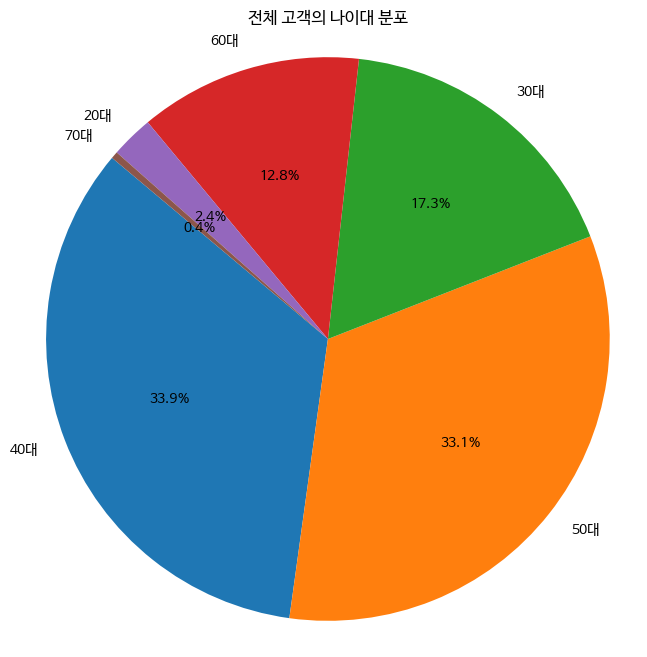

In [233]:
# 'AGE_G' 컬럼에서 '알수없음'을 제외하고 각 나이대 고객의 분포 계산
age_distribution = df_merge[df_merge['AGE_G'] != '알수없음']['AGE_G'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('전체 고객의 나이대 분포')
plt.axis('equal')  # 원을 원형으로 유지

# 그래프 표시
plt.show()

* 40대, 50대 고객층이 압도적으로 많음. 해당 고객층은 생명보험사 서비스를 적극 이용하지만, 퇴직/질병/사고 등 위험이 높다.
* (60대, 70대 제외) 모든 연령대 고객 중 20대 고객층이 가장 적고, 30대 고객 수가 두 번째로 적게 나타남을 확인 가능.
* 20대는 질병/사망으로을인해 보험사가 떠안는 risk가 상대적으로 적음. 경제활동을 이제 막 시작했거나, 준비하는 나이대이다.
> 만약, 2030의 '이탈률'이 다른 나이대 대비 상대적으로 적다면
>>==> '2030 연령대'는 성실하고, 당사에게 의미있는 고객층이라고 생각할 수 있다. 

(이게 유의성이 있다면, 보험 신규고객으로 2030을 적극 타겟팅해야하는 근거 마련 가능)

[카이제곱 검정]: 20대+30대 vs 40대 이상(40대, 50대, 60대, 70대)

    귀무가설(H0): '20대&30대'와 '40대 이상' 연령 간에는 차이가 없다.
    대립가설(H1): '20eo&30대'와 '40대 이상' 연령 간에는 차이가 있다. 
    
<0.05라면 귀무가설 기각, 대립가설 채택.부>0.05라면 귀무가설 채택

In [234]:
# 'AGE_G' 변수를 '20대', '30대'와 그 외로 나누어서 데이터 선택
data_for_chi2 = df_merge[df_merge['AGE_G'] != '알수없음'][['AGE_G', '보험가입']]
data_for_chi2['AGE_G'] = data_for_chi2['AGE_G'].apply(lambda x: '20대&30대' if x in ['20대', '30대'] else '40대 이상')

# 카이제곱 검정 실행
chi2, p, _, _ = chi2_contingency(pd.crosstab(data_for_chi2['AGE_G'], data_for_chi2['보험가입']))

# 검정 결과 출력
print(f"카이제곱 검정 통계량: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서의 검정 결과 출력
alpha = 0.05
if p < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 즉, '20대&30대'와 '40대 이상' 연령 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각하지 않습니다. 즉, '20대&30대'와 '40대 이상' 연령 간에는 통계적으로 유의한 관련성이 없을 수 있습니다.")


카이제곱 검정 통계량: 2806.630688313307
P-value: 0.0
유의수준 0.05에서 귀무가설을 기각합니다. 즉, '20대&30대'와 '40대 이상' 연령 간에는 통계적으로 유의한 관련성이 있습니다.


# 20대 타겟팅 근거 1. 나이대별 이탈고객

1. 실효해지 건수가 0인건 0으로, 1번 이상인건 모두 1로 바꾸기

[카이제곱_동일성검정]

    귀무가설(H0): '나이대'별 '이탈고객 여부'에 차이가 없다. 
    대립가설(H1): '나이대'별 '이탈고객 여부'에 차이가 있다. 

<0.05라면 귀무가설 기각, 대립가설 채택.부>0.05라면 귀무가설 채택

In [235]:
# 카이제곱 검정 수행
from scipy.stats import chi2_contingency
cross_tab = pd.crosstab(df_merge['AGE_G'], df_merge['이탈고객'])
chi2, p, dof, expected = stats.chi2_contingency(cross_tab)# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)

Chi-square 통계량: 60.36992000237264
p-값: 3.7856910393727766e-11


In [236]:
cross_tab.head(7)

이탈고객,0,1
AGE_G,,
20대,2265,176
30대,16067,1204
40대,30947,2912
50대,30158,2897
60대,11699,1075
70대,379,24
알수없음,395,35


In [237]:
cross_tab['rate'] = cross_tab[1] / (cross_tab[0] + cross_tab[1]) * 100

In [238]:
cross_tab['rate'].head(7)

AGE_G
20대     7.210160
30대     6.971223
40대     8.600372
50대     8.764181
60대     8.415532
70대     5.955335
알수없음    8.139535
Name: rate, dtype: float64

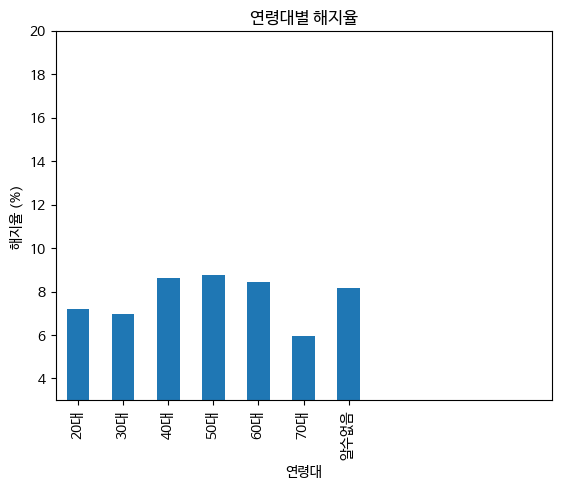

In [239]:
cross_tab['rate'].plot.bar()
plt.title('연령대별 해지율')
plt.xlabel('연령대')
plt.ylabel('해지율 (%)')
plt.xlim(-0.5, 10.5)
plt.ylim(3, 20)
cross_tab.round(2).head(11)
plt.show()

==> 결과: 2030에서 해지율이 낮게 나온 것을 확인 가능 

>>>"2030을 신규고객으로 집중 마케팅해야하는 이유 충분. 2030은 당사에게 성실하며 유의미한 고객 층이다!"

Chi-square 통계량: 60.36992000237264
p-값: 3.7856910393727766e-11


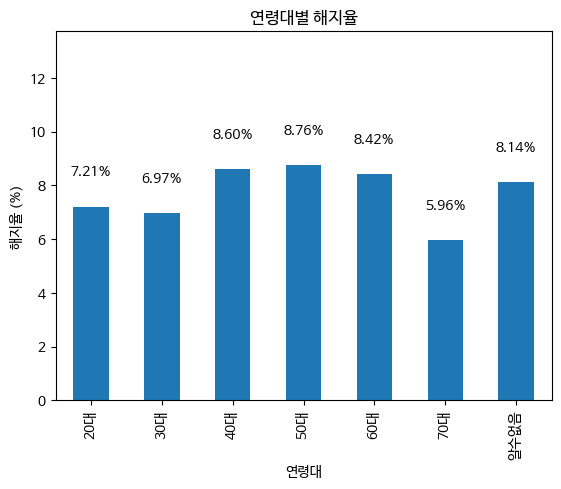

In [240]:
# 크로스탭 생성
cross_tab = pd.crosstab(df_merge['AGE_G'], df_merge['이탈고객'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(cross_tab)

# 결과 출력
print("Chi-square 통계량:", chi2)
print("p-값:", p)

# 해지율 계산 및 그래프 그리기
cross_tab['해지율(%)'] = (cross_tab[1] / (cross_tab[0] + cross_tab[1])) * 100

# 그래프 그리기
cross_tab['해지율(%)'].plot.bar()
plt.title('연령대별 해지율')
plt.xlabel('연령대')
plt.ylabel('해지율 (%)')
plt.xlim(-0.5, len(cross_tab) - 0.5)
plt.ylim(0, max(cross_tab['해지율(%)']) + 5)

# 해지율 수치 표시
for i, value in enumerate(cross_tab['해지율(%)']):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

# 나이대별 보험가입여부(0, 1, 2) 차이 비교

<Figure size 1000x1000 with 0 Axes>

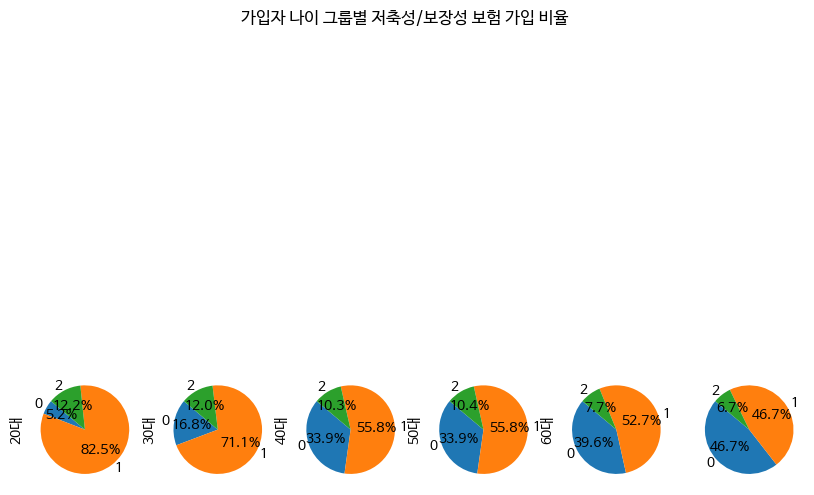

In [241]:
# '알수없음' 범주를 제외한 데이터 선택
df_filtered = df_merge[df_merge['AGE_G'] != '알수없음']

# 그룹된 원 그래프 생성
plt.figure(figsize=(10, 10))
df_pie = df_filtered.groupby(['보험가입', 'AGE_G']).size().unstack()
df_pie.plot.pie(subplots=True, autopct='%1.1f%%', startangle=140, legend=False, figsize=(10, 8))

# 그래프 커스터마이징
plt.suptitle('가입자 나이 그룹별 저축성/보장성 보험 가입 비율', y=1.02)
plt.ylabel('')  # y축 레이블 제거

# 그래프 표시
plt.show()

<Figure size 1000x1000 with 0 Axes>

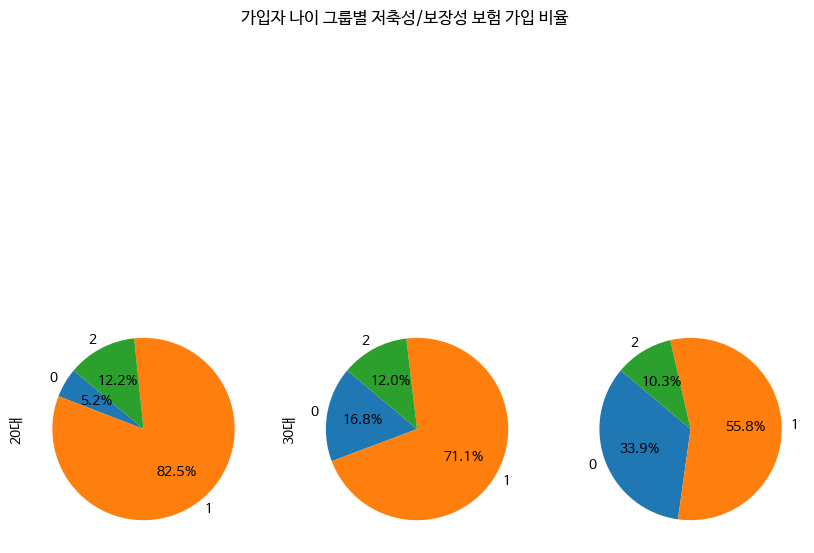

In [242]:
# '20대'와 '30대'만 필터링
selected_age_groups = ['20대', '30대', '40대']
df_filtered = df_merge[df_merge['AGE_G'].isin(selected_age_groups)]

# 그룹된 원 그래프 생성
plt.figure(figsize=(10, 10))
df_pie = df_filtered.groupby(['보험가입', 'AGE_G']).size().unstack()
df_pie.plot.pie(subplots=True, autopct='%1.1f%%', startangle=140, legend=False, figsize=(10, 8))

# 그래프 커스터마이징
plt.suptitle('가입자 나이 그룹별 저축성/보장성 보험 가입 비율', y=1.02)
plt.ylabel('')  # y축 레이블 제거

# 그래프 표시
plt.show()

<가입자 나이>

==> 20대, 30대에서 저축성/보장성 보험 1개만 가입하는 비율이 압도적으로 많이 나타남. 


> Q. 2030을 신규고객으로 유치하기 위해 어떤 전략을 펼쳐야 할까? 

>==> 보험 하나 가입하는 2030 고객들은 저축성 or 보장성 보험 중 어떤 보험을 더 많이 가입할까?

(예상: 2030은 당장 생사에 대한 두려움이 적을 것이다. 따라서 보장성 보험보다는 저축성 보험에 관심을 많이 가지고 저축성을 더 많이 가입했을 것으로 예상)

* 신규고객 유치 아이디어

    카이제곱. "나이대별 보험가입수 비율의 차이가 없다/있다" 진행. 
    가설 검정에서 '차이가 있다'가 나오면, 이걸 보고 20대&30대에서 한 개 가입한 사람의 비율이 높다고 간주할 수 있다. 

Q. 20대, 30대 중에서 1개 가입한 사람들은 저축성 or 보장성 보험 중 어떤 성격의 보험을 더 많이 드나?
==> 신규고객 유치 전략: 해당 유형 보험에서 나이 특화형 상품 개발하고 적극 마케팅 벌이기 
    
나이대별로 보장성 or 저축성 어떤걸 선호하는지 알기 위해 "보험을 한 개만 가입한 사람"은 어떤 보험을 더 많이 들었는지 보도록한다. 

[카이제곱_동일성검정]

    귀무가설(H0): '나이대'별 '저축성/보장성 보험 가입 빈도'에 차이가 없다. 
    대립가설(H1): '나이대'별 '저축성/보장성 보험 가입 빈도'에 차이가 있다. 

<0.05라면 귀무가설 기각, 대립가설 채택. >0.05라면 귀무가설 채택

In [243]:
from scipy.stats import chi2_contingency

# 카이제곱 검정을 위해 데이터프레임에서 '나이구간화(AGE_G)'와 '저축성/보장성 보험 가입빈도(보험가입)' 컬럼만 선택
data_for_chi2 = df_merge[['AGE_G', '보험가입']]

# 나이구간화와 저축성/보장성 보험 가입빈도 사이의 카이제곱 검정 실행
chi2, p, _, _ = chi2_contingency(pd.crosstab(data_for_chi2['AGE_G'], data_for_chi2['보험가입']))

# 검정 결과 출력
print(f"카이제곱 검정 통계량: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서의 검정 결과 출력
alpha = 0.05
if p < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 즉, '나이대'와 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각하지 않습니다. 즉, '나이대'와 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 없을 수 있습니다.")

카이제곱 검정 통계량: 3180.4873784592137
P-value: 0.0
유의수준 0.05에서 귀무가설을 기각합니다. 즉, '나이대'와 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 있습니다.


[카이제곱_동일성 검정]

    귀무가설(H0): '20대30대'와 '저축성/보장성 보험 가입 빈도'에 차이가 없다. 
    대립가설(H1): '20대30대'와 '저축성/보장성 보험 가입 빈도'에 차이가 있다. 
    
<0.05라면 귀무가설 기각, 대립가설 채택. >0.05라면 귀무가설 채택

In [244]:
from scipy.stats import chi2_contingency

# 'AGE_G' 변수에서 '20대'와 '30대' 범주만 선택
selected_age_groups = ['20대', '30대']
data_for_chi2 = df_merge[df_merge['AGE_G'].isin(selected_age_groups)][['AGE_G', '보험가입']]

# 카이제곱 검정 실행
chi2, p, _, _ = chi2_contingency(pd.crosstab(data_for_chi2['AGE_G'], data_for_chi2['보험가입']))

# 검정 결과 출력
print(f"카이제곱 검정 통계량: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서의 검정 결과 출력
alpha = 0.05
if p < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 즉, '20대&30대'와 '저축성/보장성 보험 가입 빈도' 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각하지 않습니다. 즉, '20대&30대'와 '저축성/보장성 보험 가입 빈도' 간에는 통계적으로 유의한 관련성이 없을 수 있습니다.")

카이제곱 검정 통계량: 225.04196808941438
P-value: 1.3575553045567147e-49
유의수준 0.05에서 귀무가설을 기각합니다. 즉, '20대&30대'와 '저축성/보장성 보험 가입 빈도' 간에는 통계적으로 유의한 관련성이 있습니다.


>* 결론: 20대&30대에서 보험(저축성 or 보장성)을 한 개만 가입한 사람의 비율이 높다.

# 저축성 or 보장성 보험 중, 하나만 가입한 2030 연령대 고객의 선호 보험 유형

NameError: name '령' is not defined

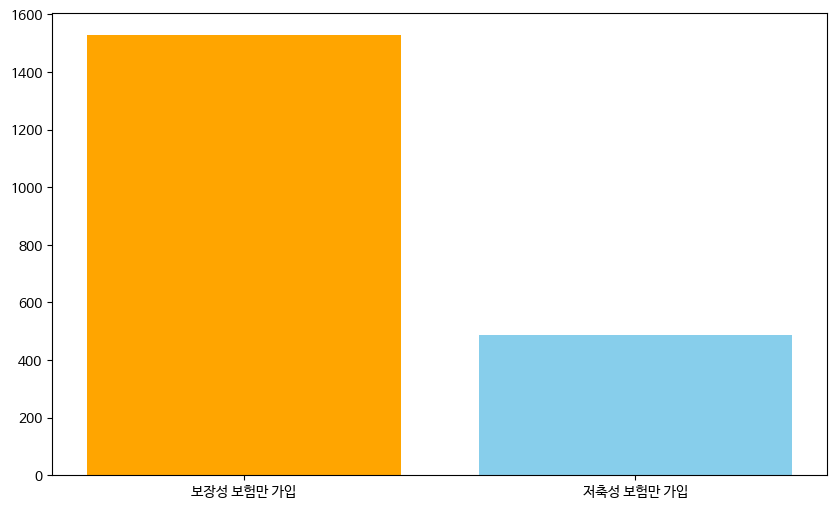

In [245]:
# 'AGE_G'가 '20대'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data = df_merge[(df_merge['AGE_G'] == '20대') & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# '보장보험가입'이 '1'인 경우의 막대 그래프
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data[filtered_data['보장보험가입'] == 1])]
ax.bar(x1, y1, color='orange', label='보장보험만 가입한 20대')

# '저축보험가입'이 '1'인 경우의 막대 그래프
x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data[filtered_data['저축보험가입'] == 1])]
ax.bar(x2, y2, color='skyblue', label='저축보험만 가입한 20대')
령
ax.set_xlabel('고객 유형')
ax.set_ylabel('고객 수')
ax.set_title('저축성 or 보장성 보험 중 하나만 가입한 20대 고객 수')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 'AGE_G'가 '20대'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data = df_merge[(df_merge['AGE_G'] == '20대') & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# '보장보험가입'이 '1'인 경우의 막대 그래프
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data[filtered_data['보장보험가입'] == 1])]
ax.bar(x1, y1, color='orange', label='보장보험만 가입한 20대')

# '저축보험가입'이 '1'인 경우의 막대 그래프
x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data[filtered_data['저축보험가입'] == 1])]
ax.bar(x2, y2, color='skyblue', label='저축보험만 가입한 20대')

ax.set_xlabel('고객 유형')
ax.set_ylabel('고객 수')
ax.set_title('저축성 or 보장성 보험 중 하나만 가입한 20대 고객 수')
ax.legend()

# 정확한 고객 수 표시
for i, v in enumerate(y1):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(y2):
    ax.text(i + 1, v + 2, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


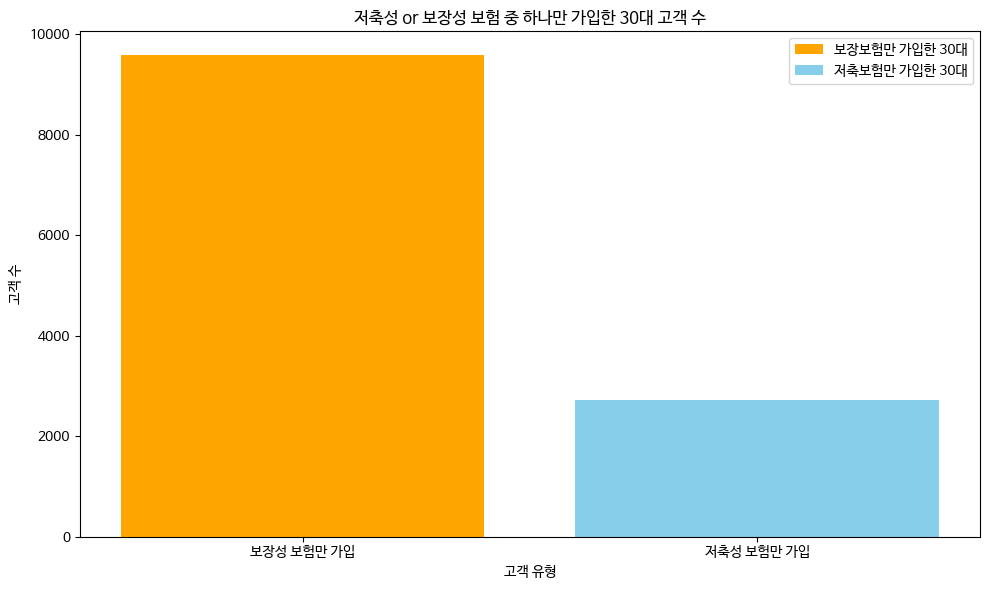

In [246]:
# 'AGE_G'가 '30대'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data = df_merge[(df_merge['AGE_G'] == '30대') & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# '보장보험가입'이 '1'인 경우의 막대 그래프
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data[filtered_data['보장보험가입'] == 1])]
ax.bar(x1, y1, color='orange', label='보장보험만 가입한 30대')

# '저축보험가입'이 '1'인 경우의 막대 그래프
x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data[filtered_data['저축보험가입'] == 1])]
ax.bar(x2, y2, color='skyblue', label='저축보험만 가입한 30대')
ax.set_xlabel('고객 유형')
ax.set_ylabel('고객 수')
ax.set_title('저축성 or 보장성 보험 중 하나만 가입한 30대 고객 수')
ax.legend()

plt.tight_layout()
plt.show()

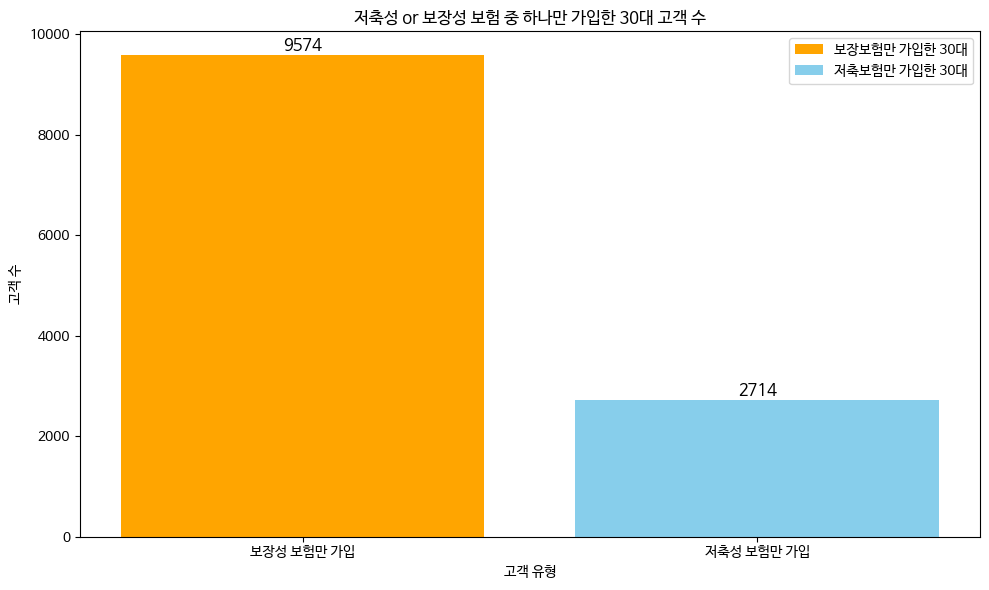

In [247]:
# 'AGE_G'가 '30대'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data = df_merge[(df_merge['AGE_G'] == '30대') & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# '보장보험가입'이 '1'인 경우의 막대 그래프
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data[filtered_data['보장보험가입'] == 1])]
ax.bar(x1, y1, color='orange', label='보장보험만 가입한 30대')

# '저축보험가입'이 '1'인 경우의 막대 그래프
x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data[filtered_data['저축보험가입'] == 1])]
ax.bar(x2, y2, color='skyblue', label='저축보험만 가입한 30대')

ax.set_xlabel('고객 유형')
ax.set_ylabel('고객 수')
ax.set_title('저축성 or 보장성 보험 중 하나만 가입한 30대 고객 수')
ax.legend()

# 정확한 고객 수 표시
for i, v in enumerate(y1):
    ax.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=12)

for i, v in enumerate(y2):
    ax.text(i + 1, v + 2, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

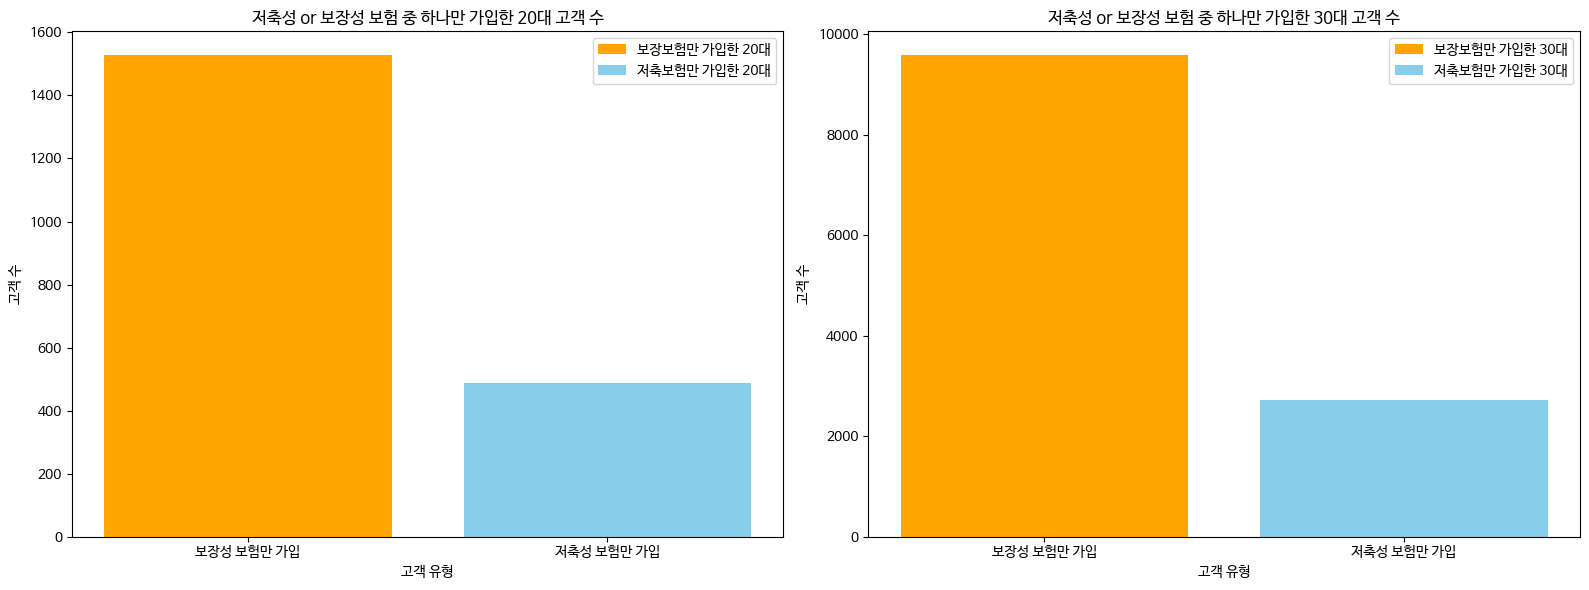

In [248]:
# 'AGE_G'가 '20대'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data_20s = df_merge[(df_merge['AGE_G'] == '20대') & (df_merge['보험가입'] == 1)]

# 'AGE_G'가 '30대'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data_30s = df_merge[(df_merge['AGE_G'] == '30대') & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1행 2열의 subplot을 생성

# 첫 번째 subplot에 그래프 그리기
ax1 = axes[0]  # 첫 번째 subplot
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data_20s[filtered_data_20s['보장보험가입'] == 1])]
ax1.bar(x1, y1, color='orange', label='보장보험만 가입한 20대')

x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data_20s[filtered_data_20s['저축보험가입'] == 1])]
ax1.bar(x2, y2, color='skyblue', label='저축보험만 가입한 20대')

ax1.set_xlabel('고객 유형')
ax1.set_ylabel('고객 수')
ax1.set_title('저축성 or 보장성 보험 중 하나만 가입한 20대 고객 수')
ax1.legend()

# 두 번째 subplot에 그래프 그리기
ax2 = axes[1]  # 두 번째 subplot
x3 = ['보장성 보험만 가입']
y3 = [len(filtered_data_30s[filtered_data_30s['보장보험가입'] == 1])]
ax2.bar(x3, y3, color='orange', label='보장보험만 가입한 30대')

x4 = ['저축성 보험만 가입']
y4 = [len(filtered_data_30s[filtered_data_30s['저축보험가입'] == 1])]
ax2.bar(x4, y4, color='skyblue', label='저축보험만 가입한 30대')

ax2.set_xlabel('고객 유형')
ax2.set_ylabel('고객 수')
ax2.set_title('저축성 or 보장성 보험 중 하나만 가입한 30대 고객 수')
ax2.legend()

plt.tight_layout()  # 그래프 간격 조절
plt.show()

* 20대 고객, 30대 고객 두 범주 모두에서 보험 하나만 가입한 사람들만을 봤을 때, 저축성 보험보다 보장성 보험만 가입한 고객 수가 압도적으로 많다. (예상 외의 결과)

2030고객은 다른 연령대에 비해 많지 않음. 당사의 미래를 위해서, 운영의 안정성을 위해서 2030 고객을 신규고객으로 적극 유치할 필요가 있음. 

>전략1. 기존 2030고객에서 저축성보다 보장성 보험의 수요가 높음. 따라서 2030나이대에 특화된 서비스/혜택을 제공하는 신규 보장성 보험 상품을 내야 한다.

>전략2. 기존 2030고객에서 저축성 보험의 수요가 낮음. 저축성 보험의 가입률을 높어야 하는 상황이라면, 은행의 저축 상품 대비 차별화가 되며 2030나이대에 특화된 저축성 보험 서비스/혜택을 제공해야 한다.

# 2030 변수 생성: 그래프 그리기 및 검정

In [249]:
# 'AGE_G' 열에서 '20대'와 '30대'에 해당하는 행을 1로 설정하고, 나머지 행은 0으로 설정합니다.
df_merge['2030'] = 0  # 모든 행을 0으로 초기화
df_merge.loc[df_merge['AGE_G'].isin(['20대', '30대']), '2030'] = 1  # '20대'와 '30대' 행을 1로 설정

df_merge['2030'].value_counts()

0    80521
1    19712
Name: 2030, dtype: int64

<Figure size 1000x1000 with 0 Axes>

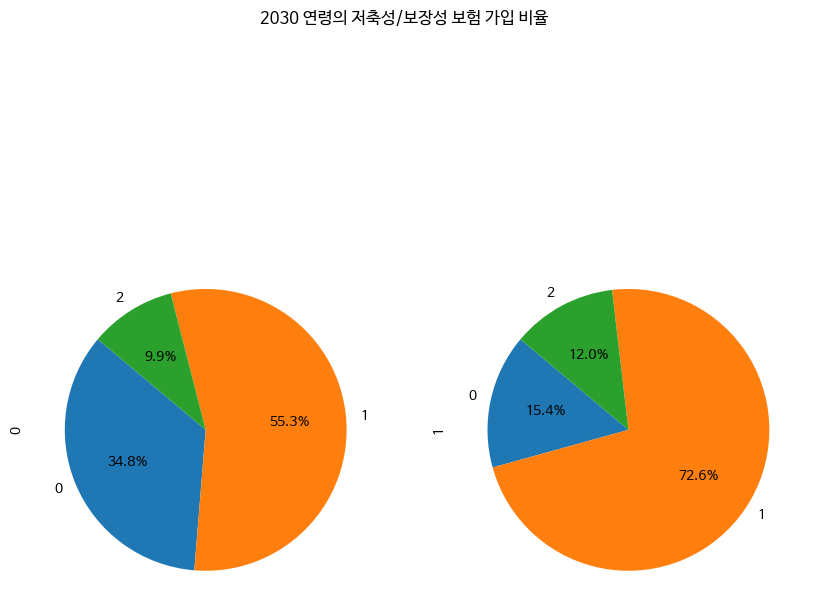

In [256]:
# 'AGE_G' 열에서 '20대'와 '30대'에 해당하는 행을 1로 설정하고, 나머지 행은 0으로 설정합니다.
df_merge['2030'] = 0  # 모든 행을 0으로 초기화
df_merge.loc[df_merge['AGE_G'].isin(['20대', '30대']), '2030'] = 1  # '20대'와 '30대' 행을 1로 설정

# 파이 차트를 그리기 위한 데이터 생성
df_pie = df_merge.groupby(['보험가입', '2030']).size().unstack()

# 그래프 그리기
plt.figure(figsize=(10, 10))
df_pie.plot.pie(subplots=True, autopct='%1.1f%%', startangle=140, legend=False, figsize=(10, 8))

# 그래프 커스터마이징
plt.suptitle('2030 연령의 저축성/보장성 보험 가입 비율', y=1.02)

# 그래프 표시
plt.show()

[카이제곱 검정]: 2030 vs 보험가입(0,1,2)

    귀무가설(H0): 2030의 저축성/보장성 보험 가입 여부에 차이가 없다. 
    대립가설(H1): 2030의 저축성/보장성 보험 가입 여부에 차이가 없다.

<0.05: 귀무가설 기각, 대립가설 채택. >0.05: 귀무가설 채택

In [259]:
from scipy.stats import chi2_contingency

# 카이제곱 검정을 위해 데이터프레임에서 '2030연령(2030)'과 '저축성/보장성 보험 가입빈도(보험가입)' 컬럼만 선택
data_for_chi2 = df_merge[['2030', '보험가입']]

# 나이구간화와 저축성/보장성 보험 가입빈도 사이의 카이제곱 검정 실행
chi2, p, _, _ = chi2_contingency(pd.crosstab(data_for_chi2['2030'], data_for_chi2['보험가입']))

# 검정 결과 출력
print(f"카이제곱 검정 통계량: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서의 검정 결과 출력
alpha = 0.05
if p < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 즉, '2030연령'과 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각하지 않습니다. 즉, '2030연령'과 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 없을 수 있습니다.")

카이제곱 검정 통계량: 2799.456330183398
P-value: 0.0
유의수준 0.05에서 귀무가설을 기각합니다. 즉, '2030연령'과 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 있습니다.


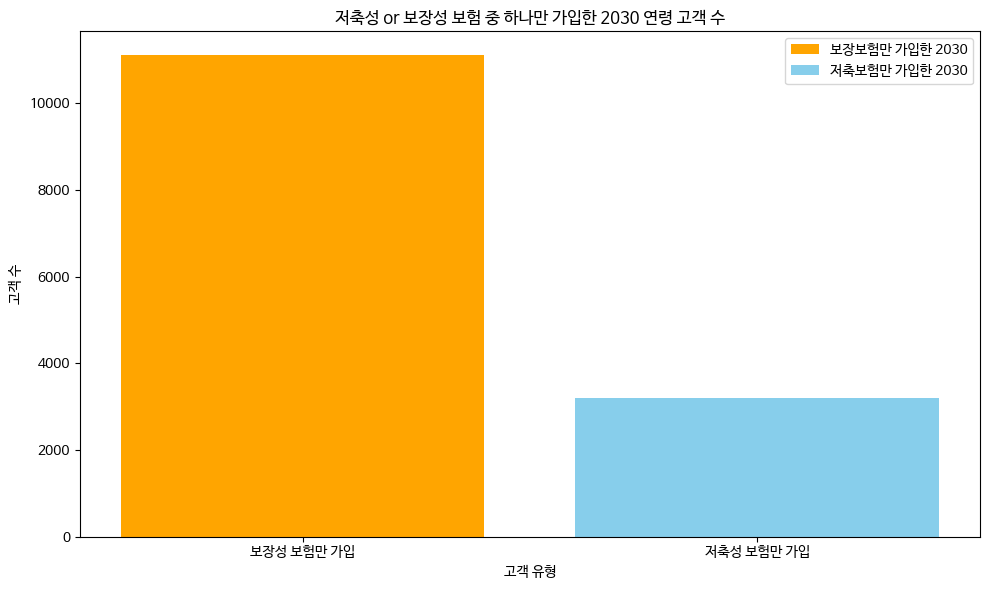

In [260]:
# '2030'가 '1'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data = df_merge[(df_merge['2030'] == 1) & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# '보장보험가입'이 '1'인 경우의 막대 그래프
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data[filtered_data['보장보험가입'] == 1])]
ax.bar(x1, y1, color='orange', label='보장보험만 가입한 2030')

# '저축보험가입'이 '1'인 경우의 막대 그래프
x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data[filtered_data['저축보험가입'] == 1])]
ax.bar(x2, y2, color='skyblue', label='저축보험만 가입한 2030')
ax.set_xlabel('고객 유형')
ax.set_ylabel('고객 수')
ax.set_title('저축성 or 보장성 보험 중 하나만 가입한 2030 연령 고객 수')
ax.legend()

plt.tight_layout()
plt.show()

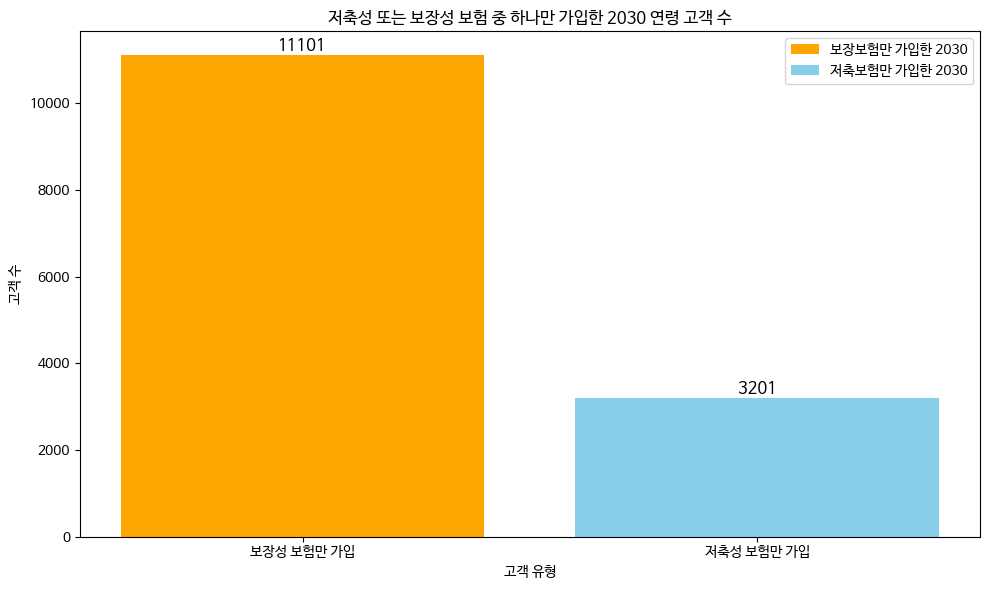

In [263]:
# '2030'가 '1'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data = df_merge[(df_merge['2030'] == 1) & (df_merge['보험가입'] == 1)]

# 그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))

# '보장보험가입'이 '1'인 경우의 막대 그래프
x1 = ['보장성 보험만 가입']
y1 = [len(filtered_data[filtered_data['보장보험가입'] == 1])]
ax.bar(x1, y1, color='orange', label='보장보험만 가입한 2030')
# 빈도수 표현
for i, v in enumerate(y1):
    ax.text(x1[i], v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# '저축보험가입'이 '1'인 경우의 막대 그래프
x2 = ['저축성 보험만 가입']
y2 = [len(filtered_data[filtered_data['저축보험가입'] == 1])]
ax.bar(x2, y2, color='skyblue', label='저축보험만 가입한 2030')
# 빈도수 표현
for i, v in enumerate(y2):
    ax.text(x2[i], v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

ax.set_xlabel('고객 유형')
ax.set_ylabel('고객 수')
ax.set_title('저축성 또는 보장성 보험 중 하나만 가입한 2030 연령 고객 수')
ax.legend()

plt.tight_layout()
plt.show()


[카이제곱 검정]: 2030중 보장성보험가입 == 1 vs 2030중 저축성보험가입 == 1

    귀무가설(H0): 보험가입 ==1인 2030중 보장성보험가입 여부와 저축성보험가입 여부에 차이가 없다. 
    대립가설(H1): 보험가입 ==1인 2030중 보장성보험가입 여부와 저축성보험가입 여부에 차이가 있다.

<0.05: 귀무가설 기각, 대립가설 채택. >0.05: 귀무가설 채택

In [262]:
# '2030'가 '1'이면서 '보험가입'이 '1'인 데이터 필터링
filtered_data1 = df_merge[(df_merge['2030'] == 1) & (df_merge['보험가입'] == 1) & (df_merge['보장보험가입'] ==1)]
filtered_data2 = df_merge[(df_merge['2030'] == 1) & (df_merge['보험가입'] == 1) & (df_merge['저축보험가입'] ==1)]


# 카이제곱 검정을 위해 데이터프레임에서 '2030연령(2030)'과 '저축성/보장성 보험 가입빈도(보험가입)' 컬럼만 선택
data_for_chi2 = df_merge[['filtered_data1', 'filtered_data2']]

# 나이구간화와 저축성/보장성 보험 가입빈도 사이의 카이제곱 검정 실행
chi2, p, _, _ = chi2_contingency(pd.crosstab(data_for_chi2['filtered_data1'], data_for_chi2['filtered_data2']))

# 검정 결과 출력
print(f"카이제곱 검정 통계량: {chi2}")
print(f"P-value: {p}")

# 유의수준 0.05에서의 검정 결과 출력
alpha = 0.05
if p < alpha:
    print("유의수준 0.05에서 귀무가설을 기각합니다. 즉, '2030연령'과 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 있습니다.")
else:
    print("유의수준 0.05에서 귀무가설을 기각하지 않습니다. 즉, '2030연령'과 '저축성/보장성 보험 가입빈도(0, 1, 2)' 간에는 통계적으로 유의한 관련성이 없을 수 있습니다.")

KeyError: "None of [Index(['filtered_data1', 'filtered_data2'], dtype='object')] are in the [columns]"

# 인사이트 도출: 20대 마케팅 전략

* 20대 사이에서 '어른이 보험'인기. 어른이 보험의 대부분은 보장성 성격이 강하다.


<신선생님 피드백>

선호도 조사를 위해 나이대별로 보험 하나 가입한 사람 수에 차이가 있다 없다 보기
- 보험하나 가입한 사람 수 나이가 여러 범주. 보험 하나. 
==> 카이 스퀘ㅓ는 연령대 속하는 사람들 있고 개수가 있음. 보험을 하나 가입했다면, 하나 가입했단느 유무로 따질 수 있음. 
카이제곱으로 차이가 있다면, 보험 한 개 든 사람, 두 개 든사람, 0개 든 사람을 같이 비교하는 거면 ㅁㄹ이 된다. 아니면

그래프 그렸을 떄 차이 보기 --> 20개 가장 적음. 20대 신규고객 유치를 위해 저축/보장의 검정
만약에 차이가 있으면, 차이가 있으면 보장성 더 높음. 그럼 맞음. ==> 신규고객 유치 시 20대 타겟 가능. 